In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import scipy
import scipy.stats as stats

# set max rows to display
pd.set_option('display.max_rows', 500)

In [21]:
df = pd.read_csv('simulated_transaction_2024.csv')
bank_test_2 = df.copy() 

## Transaction Amount investigation & justification

In [22]:
bank_amount_null = bank[bank['Amount'].isnull()]

bank_amount_null.head(15)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
10951,11/01/2023,09:48,384497904.0,1053.003650,NaN,NaN,Gamestation
13694,16/01/2023,13:43,405416860.0,2096.412650,NaN,NaN,Gamestation
14117,17/01/2023,10:30,620227043.0,1401.458861,NaN,NaN,Blackwell's
17105,23/01/2023,16:41,684988568.0,1155.664625,NaN,NaN,CeX
19756,29/01/2023,18:20,924045955.0,1669.886650,NaN,NaN,JustEat
28160,04/02/2023,09:20,623156843.0,1612.005500,NaN,NaN,Blackwell's
30751,08/02/2023,22:21,899983008.0,-160.647450,NaN,791220575.0,NaN
34681,18/02/2023,09:41,859264768.0,403.097292,NaN,NaN,CeX
35415,20/02/2023,00:33,679911053.0,1490.139357,NaN,NaN,Deliveroo
37433,25/02/2023,10:58,585133606.0,440.817400,NaN,NaN,The Works


- All null transactions above - at various merchants - could be missing salaries or missing incomings.

#### Missing transactions at tesco for account number = 679911053.0 

In [23]:
# account number == 679911053.0  and 'Third Party Name' == Tesco
# 679911053.0
# 654329190.0	
bank_user = bank[(bank['Account No'] == 654329190.0	) & (bank['Third Party Name'] == 'Tesco')]

bank_user.head(32)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
6114,02/01/2023,12:31,654329190.0,2086.620300,-71.940000,NaN,Tesco
12233,13/01/2023,19:09,654329190.0,1943.344200,-73.380000,NaN,Tesco
13806,16/01/2023,17:07,654329190.0,1924.346054,-2.030000,NaN,Tesco
14922,19/01/2023,09:21,654329190.0,1817.458854,-52.572836,NaN,Tesco
18831,27/01/2023,20:12,654329190.0,1696.718754,-51.830000,NaN,Tesco
27109,02/02/2023,08:23,654329190.0,2142.222186,-20.530000,NaN,Tesco
29247,06/02/2023,09:15,654329190.0,2038.918536,-78.340000,NaN,Tesco
31529,10/02/2023,20:47,654329190.0,1903.284699,-93.710000,NaN,Tesco
35429,20/02/2023,05:30,654329190.0,1842.726448,-13.720000,NaN,Tesco
35806,20/02/2023,19:32,654329190.0,1772.569748,-53.190000,NaN,Tesco


- Check if amount incoming for this account number and merchant is positive or negative?
- If negative we check the distribution of spending.

<Axes: xlabel='Amount', ylabel='Density'>

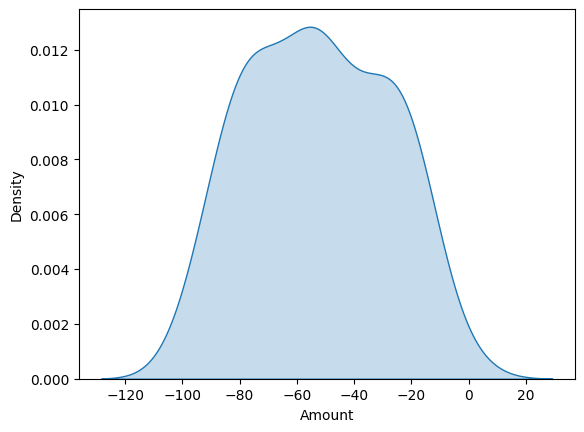

In [24]:
#kde plot of the amount of transactions
sns.kdeplot(bank_user['Amount'], fill=True)

- Approximately normally distributed.

#### Missing transactions at Matalan for account number = 737547541.0

In [25]:
bank_user_2 = bank[(bank['Account No'] == 737547541.0) & (bank['Third Party Name'] == 'Matalan')]

print(bank_user_2.shape)

bank_user_2

(21, 7)


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
11071,11/01/2023,12:17,737547541.0,2648.892160,-11.450,NaN,Matalan
15400,20/01/2023,10:40,737547541.0,2093.861014,-90.300,NaN,Matalan
15411,20/01/2023,11:03,737547541.0,1964.375014,-93.206,NaN,Matalan
15452,20/01/2023,12:43,737547541.0,1384.159014,-193.890,NaN,Matalan
29954,07/02/2023,11:08,737547541.0,1824.573068,-27.300,NaN,Matalan
29999,07/02/2023,12:20,737547541.0,1538.987068,-135.090,NaN,Matalan
46623,05/03/2023,10:27,737547541.0,1045.701600,-91.690,NaN,Matalan
46802,05/03/2023,12:20,737547541.0,673.357600,-130.870,NaN,Matalan
46937,05/03/2023,14:22,737547541.0,388.471600,-63.000,NaN,Matalan
46984,05/03/2023,15:23,737547541.0,-44.800400,-167.990,NaN,Matalan


<Axes: xlabel='Amount', ylabel='Density'>

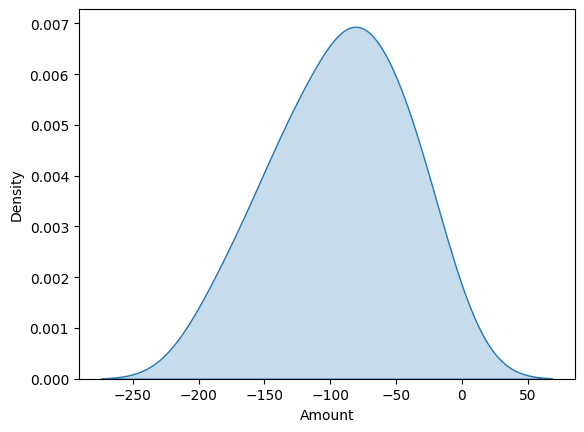

In [26]:
sns.kdeplot(bank_user_2['Amount'], fill=True)

- approximately normally distributed - seems to be safe to impute by mean.

#### Impute transaction amount based on mean spending at a particular merchant for the said account

In [27]:
for i in range(len(bank_test_2)):
    
    if pd.isnull(bank_test_2.loc[i,'Amount']):
        spend_distribution = bank_test_2[(bank_test_2['Account No'] == bank_test_2.loc[i,'Account No']) & (bank_test_2['Third Party Name'] == bank_test_2.loc[i,'Third Party Name'])]
        #print(spend_distribution)
        # If only negative transactions going to the particular merchant - impute by mean
        if np.any(spend_distribution['Amount'] < 0):
            
            impute_value = np.mean(spend_distribution['Amount'])
            bank_test_2.loc[i,'Amount'] = impute_value
            
        else: 
            # put continute to see positive transactions/inbound payments
            continue
        

##### Investigate the edge cases which were not automatically imputed.

In [28]:
# check if there are any null values left
print(bank.isnull().sum())

# get null values in Amount column
bank_amount_null = bank[bank['Amount'].isnull()]

bank_amount_null.head(15)

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                        55
Third Party Account No    223764
Third Party Name            7079
dtype: int64


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
10951,11/01/2023,09:48,384497904.0,1053.003650,NaN,NaN,Gamestation
13694,16/01/2023,13:43,405416860.0,2096.412650,NaN,NaN,Gamestation
14117,17/01/2023,10:30,620227043.0,1401.458861,NaN,NaN,Blackwell's
17105,23/01/2023,16:41,684988568.0,1155.664625,NaN,NaN,CeX
19756,29/01/2023,18:20,924045955.0,1669.886650,NaN,NaN,JustEat
28160,04/02/2023,09:20,623156843.0,1612.005500,NaN,NaN,Blackwell's
30751,08/02/2023,22:21,899983008.0,-160.647450,NaN,791220575.0,NaN
34681,18/02/2023,09:41,859264768.0,403.097292,NaN,NaN,CeX
35415,20/02/2023,00:33,679911053.0,1490.139357,NaN,NaN,Deliveroo
37433,25/02/2023,10:58,585133606.0,440.817400,NaN,NaN,The Works


##### Personal transactions

In [29]:
bank_null_personal = bank[(bank['Third Party Name'].isnull()) & (bank['Amount'].isnull())]

bank_null_personal

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
30751,08/02/2023,22:21,899983008.0,-160.64745,NaN,791220575.0,NaN
65949,08/04/2023,12:09,583579399.0,514.90230,NaN,NaN,NaN


- May need to drop if both amount & third part account no are missing - index == 65949

In [30]:
bank_null_personal_user1 = bank[(bank['Account No'] == 425730826.0) & (bank['Third Party Account No'] == 191631876.0)]

bank_null_personal_user1

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
20245,30/01/2023,23:59,425730826.0,1349.167609,1792.727273,191631876.0,NaN
38812,27/02/2023,23:59,425730826.0,890.064359,1910.000000,191631876.0,NaN
56579,30/03/2023,23:59,425730826.0,1927.967809,1910.000000,191631876.0,NaN
74540,29/04/2023,23:59,425730826.0,1528.318159,1910.000000,191631876.0,NaN
93312,30/05/2023,23:59,425730826.0,1642.332659,1910.000000,191631876.0,NaN
112954,29/06/2023,23:59,425730826.0,1424.408009,1910.000000,191631876.0,NaN
133290,30/07/2023,23:59,425730826.0,-414.458091,1910.000000,191631876.0,NaN
154604,30/08/2023,23:59,425730826.0,1211.991909,1910.000000,191631876.0,NaN
176467,29/09/2023,23:59,425730826.0,1859.939409,1910.000000,191631876.0,NaN
197918,29/10/2023,20:06,425730826.0,821.476909,620.000000,191631876.0,NaN


- Could probably impute by mean - but can see there's an additional payment in october but all other ones are the same - impute by mode??

In [31]:
bank_null_personal_user2 = bank[(bank['Account No'] == 899983008.0) & (bank['Third Party Account No'] == 791220575.0)]

bank_null_personal_user2

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
30751,08/02/2023,22:21,899983008.0,-160.64745,NaN,791220575.0,NaN


- No history of this payment type - would need to be dropped.

In [32]:
bank_null_personal_user3 = bank[(bank['Account No'] == 331684336.0) & (bank['Third Party Account No'] == 250957494.0)]

bank_null_personal_user3

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
20704,30/01/2023,23:59,331684336.0,1235.60483,-780.0,250957494.0,NaN
38404,27/02/2023,23:59,331684336.0,1120.53913,-780.0,250957494.0,NaN
56855,30/03/2023,23:59,331684336.0,956.02468,-780.0,250957494.0,NaN
74625,29/04/2023,23:59,331684336.0,686.56508,-780.0,250957494.0,NaN
93265,30/05/2023,23:59,331684336.0,543.95503,-780.0,250957494.0,NaN
112596,29/06/2023,23:59,331684336.0,361.94938,-780.0,250957494.0,NaN
133611,30/07/2023,23:59,331684336.0,-148.37317,-780.0,250957494.0,NaN
154763,30/08/2023,23:59,331684336.0,-296.59087,-780.0,250957494.0,NaN
176043,29/09/2023,23:59,331684336.0,-430.84747,-780.0,250957494.0,NaN
198658,30/10/2023,23:59,331684336.0,-438.81637,-780.0,250957494.0,NaN


**NEXT STEPS**

- Check if spending distribution > 3 and impute by mode on personal transactions.

##### Merchant Transactions

In [42]:
bank_user_cex = bank[(bank['Account No'] == 859264768.0	) & (bank['Third Party Name'] == 'CeX')]

print(len(bank_user_cex))

bank_user_cex

1


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
34681,18/02/2023,09:41,859264768.0,403.097292,NaN,NaN,CeX


- No previous history of transactions at CeX and payment at 09:41 in the morning - so not likely to be a salary payment so must be an outgoing negative payment

515


Text(0.5, 1.0, 'CeX Transactions')

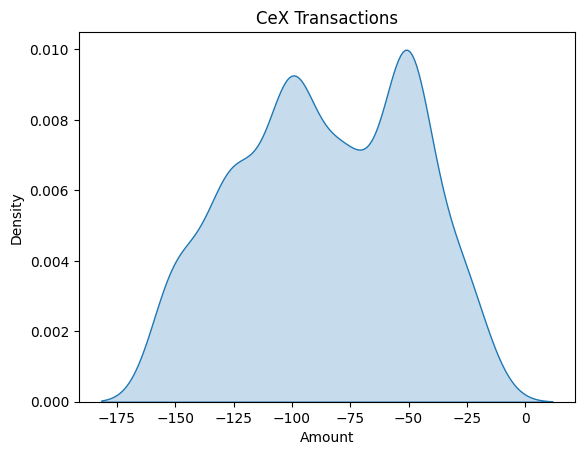

In [41]:
bank_cex = bank[(bank['Third Party Name'] == 'CeX') & (bank['Amount'] < 0)]

print(len(bank_cex))

sns.kdeplot(bank_cex['Amount'], fill=True)

plt.title('CeX Transactions')

- Cex payments seem quite gaussian - so safe to impute by mean if spending distribution len < 5

In [35]:
bank_user_brilliant_brushes = bank[(bank['Account No'] == 422955974.0	) & (bank['Third Party Name'] == 'Brilliant Brushes')]
bank_user_brilliant_brushes

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
173,01/01/2023,00:00,422955974.0,3322.500000,1842.5,NaN,Brilliant Brushes
21763,01/02/2023,00:00,422955974.0,2716.030575,1842.5,NaN,Brilliant Brushes
39815,01/03/2023,00:00,422955974.0,2352.771035,1842.5,NaN,Brilliant Brushes
57702,01/04/2023,00:00,422955974.0,1462.091885,1842.5,NaN,Brilliant Brushes
75897,01/05/2023,00:00,422955974.0,1308.688335,1842.5,NaN,Brilliant Brushes
94427,01/06/2023,00:00,422955974.0,1502.611585,1842.5,NaN,Brilliant Brushes
114190,01/07/2023,00:00,422955974.0,1694.721335,1842.5,NaN,Brilliant Brushes
134947,01/08/2023,00:00,422955974.0,1577.612885,1842.5,NaN,Brilliant Brushes
155858,01/09/2023,00:00,422955974.0,1198.854985,1842.5,NaN,Brilliant Brushes
177453,01/10/2023,00:00,422955974.0,1443.982785,1842.5,NaN,Brilliant Brushes


- These are all salary payments clearly so can be imputed by any average measure!

In [36]:
bank_user_stitch = bank[(bank['Account No'] == 895331556.0	) & (bank['Third Party Name'] == 'Stitch By Stitch')]
bank_user_stitch


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
20477,31/01/2023,00:00,895331556.0,971.4748,1675.0,NaN,Stitch By Stitch
38463,28/02/2023,00:00,895331556.0,1039.2420,1675.0,NaN,Stitch By Stitch
56601,31/03/2023,00:00,895331556.0,867.2482,1675.0,NaN,Stitch By Stitch
74555,30/04/2023,00:00,895331556.0,1073.9521,1675.0,NaN,Stitch By Stitch
93395,31/05/2023,00:00,895331556.0,1203.2989,1675.0,NaN,Stitch By Stitch
112638,30/06/2023,00:00,895331556.0,940.5733,1675.0,NaN,Stitch By Stitch
133752,31/07/2023,00:00,895331556.0,933.7236,1675.0,NaN,Stitch By Stitch
154900,31/08/2023,00:00,895331556.0,1051.4206,1675.0,NaN,Stitch By Stitch
176046,30/09/2023,00:00,895331556.0,721.5859,1675.0,NaN,Stitch By Stitch
198754,31/10/2023,00:00,895331556.0,906.7850,1675.0,NaN,Stitch By Stitch


- Again more salary payments so can be imputed by any average.

**NEXT STEPS**
- So transactions are positive impute by mean.
- If spending distribution len < 3 then take mean of overall spending at that merchant.

## Transaction amount impute - final code

In [45]:
bank = df.copy()

for i in range(len(bank)):
    
    if pd.isnull(bank.loc[i,'Amount']):
        
        ## Merchant transactions - where third party name is not null
        if pd.notnull(bank.loc[i,'Third Party Name']):
        
            # merchant transaction distribution
            spend_distribution = bank[(bank['Account No'] == bank.loc[i,'Account No']) & (bank['Third Party Name'] == bank.loc[i,'Third Party Name'])]
            
            # Providing there is a history of multiple transactions - set threshold to impute by mean on individual tranactions from the account to the merchant or via the overall merchant spend distribution
            if len(spend_distribution) > 5:
                # If only payments to a merchant - impute by mean of spend at that merchant for that account- some times it's a direct debit    
                if np.any(spend_distribution['Amount'] < 0):
                    impute_value = np.mean(spend_distribution['Amount'])
                    bank.loc[i,'Amount'] = impute_value # replace value
                
                # Positive payments from the merchant - indicate a salary so take the mode payment.    
                elif np.any(spend_distribution['Amount'] > 0):
                    # impute by mode
                    print(float(stats.mode(spend_distribution['Amount'])[0]))
                    impute_value = float(stats.mode(spend_distribution['Amount'])[0])
                    bank.loc[i,'Amount'] = impute_value # replace value
            
            # If too small history of transactions - use overall merchant spend distribution to impute - for CeX edge case
            else:
                merchant_spend_distribution = bank[(bank['Third Party Name'] == bank.loc[i,'Third Party Name'])] # get overall merchant spend distribution
                impute_value = np.mean(merchant_spend_distribution['Amount']) # impute by this
                #bank.loc[i,'Amount'] = impute_value # replace value
                
        ## Personal transactions - where third party name is null
        elif pd.isnull(bank.loc[i,'Third Party Name']):
            personal_distribution = bank[(bank['Account No'] == bank.loc[i,'Account No']) & (bank['Third Party Account No'] == bank.loc[i,'Third Party Account No'])]
            
            # Providing there is a history of multiple transactions take an average
            if len(personal_distribution) > 1:
                impute_value = np.mean(personal_distribution['Amount'])
                bank.loc[i,'Amount'] = impute_value
            
            # Let's leave this edge case to investigate at the end
            else: 
                continue # continue to next iteration

3750.0
2021.0
1842.5
1675.0


In [46]:
# check null values

print(bank.isnull().sum())

# get null values in dataset
bank_null = bank[bank['Amount'].isnull()]
bank_null

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                        17
Third Party Account No    223764
Third Party Name            7079
dtype: int64


,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
17105,23/01/2023,16:41,684988568.0,1155.664625,NaN,NaN,CeX
28160,04/02/2023,09:20,623156843.0,1612.005500,NaN,NaN,Blackwell's
30751,08/02/2023,22:21,899983008.0,-160.647450,NaN,791220575.0,NaN
34681,18/02/2023,09:41,859264768.0,403.097292,NaN,NaN,CeX
37433,25/02/2023,10:58,585133606.0,440.817400,NaN,NaN,The Works
65949,08/04/2023,12:09,583579399.0,514.902300,NaN,NaN,NaN
73954,29/04/2023,02:47,555804115.0,-1222.221848,NaN,NaN,JustEat
90696,24/05/2023,12:36,933745726.0,605.138706,NaN,NaN,Wool
96489,31/05/2023,23:59,627723633.0,-725.245378,NaN,NaN,Xbox
116747,30/06/2023,23:59,145387690.0,5761.561977,NaN,NaN,SquareOnix
